## **TASK 1 - Prediction using Supervised ML**
To Predict the percentage of marks of the students based on the number of hours they studied

## Author-Chayan Sharma

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Dataset conatins 25 rows and 2 columns with no NULL values

### Comparing Marks with Study Hours

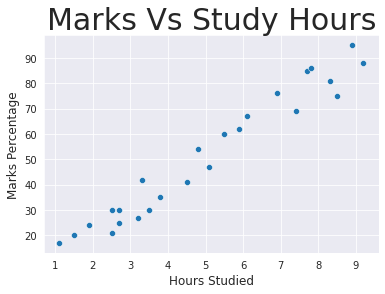

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=30)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

######Buidling a Regression line to confirm the corelation between 'Marks Percentage' and 'Hours Studied'

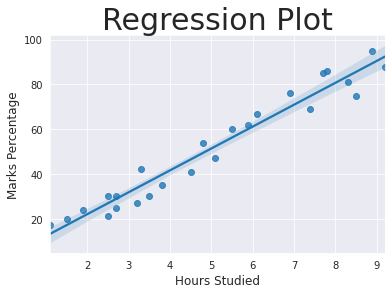

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=30)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

## Training the Model
###  Splitting the Data

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression()
rg.fit(train_X, train_y)
print("Successfully trained")

Successfully trained


### Comparing the Predicted Marks with the Actual Marks


In [ ]:
pred_y = rg.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visualizing the Predicted Marks with the Actual Marks


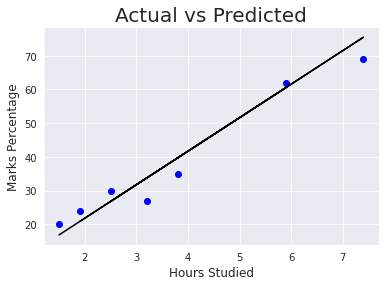

In [ ]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

###Evaluating the Model

In [ ]:
# Calculating the accuracy of the model
from sklearn import metrics
print('Mean absolute error: ',metrics.mean_absolute_error(val_y,pred_y))
print('Mean Squared error: ',metrics.mean_squared_error(val_y,pred_y))

Mean absolute error:  4.130879918502482
Mean Squared error:  20.33292367497996


In [ ]:
hours = [9.25]
answer = rg.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
